 <img src="https://minas.medellin.unal.edu.co/images/noticias/logoUN.gif" alt="logo" width="250">

<center> <h2> Taller </h2> </center>
<center> <h2> Visión Artificial </h2> </center>
<center> <h2> 2024-1S </h2> </center>


### Nota:
Todo punto debe de tener una explicación de lo que se está haciendo y por qué se está haciendo, de lo contrario no se tendrá en cuenta (se pone 0 en el punto).

#### Nombre:
Maria Paula Garzón

Juan Gabriel Góez Duque

Madeleinne Paulina Henao García

#### Documento de identidad:

Maria Paula Garzón:1113978868

Gabriel Góez: 1001132660

Madeleinne Henao: 1001815619

#### Correo:

mgarzoncai@unal.edu.co

jgoezd@unal.edu.co

mhenaoga@unal.edu.co

In [4]:
# Importar las liberías requeridas
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
# Importar las librerías requeridas
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Especificar la ruta completa a tu imagen en Google Drive
ruta_imagen = '/content/drive/MyDrive/2024-01/vision_artificial/Parcial2/Libro_Enfocado.jpg'

# Leer la imagen utilizando OpenCV
img = cv2.imread(ruta_imagen)

## Punto 1 (10%)

Este es un punto de comprensión sobre la imagen y su relación con el entorno. Para comprender la imagen, se hará lo que se pide en cada uno de los literales. No se explica a mayor detalle ya que cada literal es autoexplicativo.

### A. (1%)
Tomar una fotografía de un objeto de estudio que se desee identificar o estudiar, leer la imagen en RGB con opencv y mostrar la imagen, asegurándose de que no provenga de un conjunto de datos preexistente (En caso de usar una imagen de internet su nota TOTAL se verá reducida considerablemente, si la imagen es muy sencilla de analizar también se le reducirá considerablemente su calificación TOTAL)

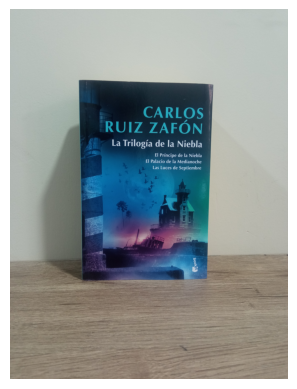

In [7]:
# Convertir la imagen de BGR a RGB
imagen_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(imagen_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()

### B. (1%)
Describir el entorno en el que se tomó la foto, como la ubicación, las condiciones climáticas y la iluminación. Por ejemplo, la foto se tomó en un jardín local en un día soleado con luz natural. Detallar el tamaño de la imagen (por ejemplo, 1920x1080 píxeles) y su formato (por ejemplo, JPEG, PNG, TIF).


La foto se tomó en la habitación de uno de los integrantes, sobre una mesa, con luz indirecta de la habitación, además de luz natural proveniente de una ventana. Con tamaño de imágen 3120 píxeles de ancho y 4160 píxeles de largo, en formato JPG.

### C. (2.5%)
Analizar el histograma de la imagen para observar la distribución de las intensidades de los píxeles y su relación con las características visuales del objeto y el entorno.

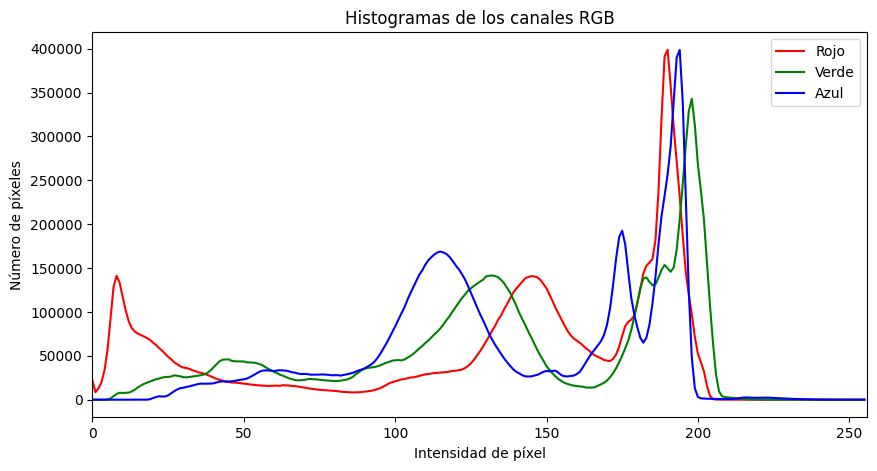

In [8]:
# Separar los canales de color
canal_rojo = imagen_rgb[:, :, 0]
canal_verde = imagen_rgb[:, :, 1]
canal_azul = imagen_rgb[:, :, 2]

# Crear los histogramas
hist_rojo = cv2.calcHist([canal_rojo], [0], None, [256], [0, 256])
hist_verde = cv2.calcHist([canal_verde], [0], None, [256], [0, 256])
hist_azul = cv2.calcHist([canal_azul], [0], None, [256], [0, 256])

# Configurar la figura
plt.figure(figsize=(10, 5))

# Histograma del canal rojo
plt.plot(hist_rojo, color='red', label='Rojo')
plt.xlim([0, 256])

# Histograma del canal verde
plt.plot(hist_verde, color='green', label='Verde')
plt.xlim([0, 256])

# Histograma del canal azul
plt.plot(hist_azul, color='blue', label='Azul')
plt.xlim([0, 256])

# Añadir leyenda
plt.legend()

# Mostrar el histograma
plt.title('Histogramas de los canales RGB')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Número de píxeles')
plt.show()

#### Explicación

La imagen, debido a las tonalidades del libro, presenta grandes picos en los colores Red y Blue del RGB, pero más allá de esto, en el histograma no se ven picos en las intensidades bajas, esto es, un poco conteo de pixeles, por tanto se verán colores un poco más vivos. También se puede notar una ausencia de pixeles con intensidad mayor a 200, dejando ver que no se presenta una sobreexposición de los colores.

### D. (2.5%)

Estudiar el espacio de color de la imagen, con el objetivo de identificar en qué canales se puede distinguir mejor el objeto de estudio. Seleccionar los canales de color candidatos donde se identifique mejor el objeto de estudio.


In [6]:
def plot_channels(
    image: np.ndarray,
    mode='rgb',
    title: str = 'RGB channels',
    channel_names: tuple = ['Channel R', 'Channel G', 'Channel B'],
    cmaps: tuple = ('Reds', 'Greens', 'Blues'),
    figsize: tuple = (30, 7),
    individual_images: list = []
) -> None:
    # Split the image into its channels
    try:
        mode = mode.lower()
        if mode == 'rgb':
            channels = [image[:, :, i] for i in range(3)]
        elif mode == 'bgr':
            channels = [image[:, :, i] for i in [2, 1, 0]]
            cmaps = cmaps[::-1]
            channel_names = channel_names[::-1]
        elif mode == 'cmy':
            channels = [255 - image[:, :, i] for i in range(3)]
            cmaps = ('GnBu', 'RdPu', 'YlOrBr')
            channel_names = ('Channel C', 'Channel M', 'Channel Y')
        elif mode == 'yiq':
            channels = [
                0.299 * image[:, :, 0] + 0.587 *
                image[:, :, 1] + 0.114 * image[:, :, 2],
                0.596 * image[:, :, 0] - 0.274 *
                image[:, :, 1] - 0.322 * image[:, :, 2],
                0.211 * image[:, :, 0] - 0.523 *
                image[:, :, 1] + 0.312 * image[:, :, 2]
            ]
            cmaps = ('gray', 'gray', 'gray')
            channel_names = ('Channel Y', 'Channel I', 'Channel Q')
        elif mode == 'yuv':
            channels = [image[:, :, i] for i in range(3)]
            cmaps = ('gray', 'gray', 'gray')
            channel_names = ('Channel Y', 'Channel U', 'Channel V')
        elif mode == 'hsl':
            # Convert to HSL
            size = np.shape(image)
            image_HSL = np.zeros((size), dtype=np.float32)
            # Algorithm to convert RGB to HSL
            for i in range(size[0]):
                for j in range(size[1]):
                    # Normalization
                    max_value = np.max(image[i][j])
                    min_value = np.min(image[i][j])

                    channel_S = max_value - min_value
                    channel_L = channel_S / 2

                    image_HSL[i][j][1] = channel_S
                    image_HSL[i][j][2] = channel_L

                    if (max_value == min_value):
                        image_HSL[i][j][0] = 0
                        continue

                    red = image[i][j][0]
                    green = image[i][j][1]
                    blue = image[i][j][2]

                    if (max_value == red):
                        channel_H = (green - blue) * 60 / (max_value - min_value)
                    elif (max_value == green):
                        channel_H = (blue - red) * 60 / (max_value - min_value) + 120
                    else:
                        channel_H = (red - green) * 60 / (max_value - min_value) + 240
                    if channel_H >= 0:
                        image_HSL[i, j, 0] = channel_H
                    else:
                        image_HSL[i, j, 0] = 360.0 - channel_H
            channels = [image_HSL[:, :, i] for i in range(3)]
            cmaps = ('gray', 'gray', 'gray')
            channel_names = ['Channel H', 'Channel S', 'Channel L']
        elif mode == 'hsv':
            channels = [image[:, :, i] for i in range(3)]
            cmaps = ('gray', 'gray', 'gray')
            channel_names = ['Channel H', 'Channel S', 'Channel V']
        elif mode == 'lab':
            channels = [image[:, :, i] for i in range(3)]
            cmaps = ('gray', 'gray', 'gray')
            channel_names = ['Channel L', 'Channel A', 'Channel B']
        elif mode == 'xyz':
            channels = [image[:, :, i] for i in range(3)]
            cmaps = ('gray', 'gray', 'gray')
            channel_names = ['Channel X', 'Channel Y', 'Channel Z']
        elif mode == 'custom':
            channels = [image[:, :, i] for i in range(3)]
            cmaps = cmaps
            channel_names = channel_names
        elif mode == 'individual':
            channels = individual_images
            cmaps = cmaps
            channel_names = channel_names
        else:
            raise ValueError(
                f'Invalid mode. Use "rgb", "bgr", "cmy", "yiq", "yuv", "hsl", "hsv", "lab", "xyz", "custom" or "individual".')

        # Plot the channels
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        fig.suptitle(title, fontsize=20)

        for ax, channel, name, cmap in zip(axes, channels, channel_names, cmaps):
            ax.set_title(name)
            ax.imshow(channel, cmap=cmap, aspect='auto')
            ax.axis('off')
    except Exception as e:
        print(f'Error: {e}')


color_space = ["rgb", "bgr", "cmy", "yiq", "yuv", "hsl", "hsv", "lab", "xyz"]
for mode in color_space:
    plot_channels(
        image=imagen_rgb,
        mode=mode,
        title=f"{mode.upper()} channels"
    )

Output hidden; open in https://colab.research.google.com to view.

#### Justificación


Los canales que nos permiten identificar fácilmente el objeto de interés, son los siguientes:

Los canales RGB permiten identificar de manera diferenciadora el objeto de interés, en particular es interesante el canal R, ya que permite que la distinción que hay entre mesa, comienzo del libro; sea más notoria.

Los canales S y L también pueden ser bastantes útiles para esta distinción, ya que eliminan casi que por completo el fondo del objeto de interés, pero la distinción entre mesa, objeto no es tan visible (Esto de probar varias veces el código en las secciones posteriores).

Por tanto, para el análisis se escoge el canal R, del RGB.


### E. (3%)

Seleccionar el canal de color donde se identifique mejor el objeto de estudio.

Depende del enfoque que se le quiera dar, cualquiera del canal H del HSL o el Canal L del HSL pueden servir, ya que si quisieramos leer el nombre del libro, el canal L serviría más, pero si desearamos delimitar el contorno del libro, el canal H serviría más. En este caso se escogerá el **canal H**, debido a que puede ser de utilidad para el análisis posterior.

# Punto 2 (25%)

Después de seleccionar el canal de color apropiado, realice un análisis de las operaciones unarias disponibles y elija la operación candidata que mejor contribuya a la identificación del objeto de estudio. En caso de que ninguna operación unaria resulte útil para mejorar la identificación del objeto de estudio, justifique esta conclusión, explique por qué las operaciones estudiadas no han sido efectivas y cómo sus efectos en la imagen no han sido suficientes para resaltar las características del objeto.

<b>Ayuda:</b> Use el histograma en el canal seleccionado.

Basándose en los resultados obtenidos en los puntos anteriores, realice un estudio detallado de las transformaciones no lineales, con el objetivo de identificar posibles operaciones que permitan mejorar la detección del objeto de estudio.

Si encuentra una transformación no lineal que mejora significativamente la identificación del objeto, describa cómo esta transformación contribuye a resaltar sus características y facilita su detección. Explique cómo los ajustes en los parámetros de la transformación seleccionada influyen en el resultado y cómo optimizar estos ajustes para lograr la mayor eficacia en la búsqueda del objeto.

En caso de que ninguna transformación no lineal resulte útil para mejorar la identificación del objeto de estudio, justifique esta conclusión. Explique por qué las transformaciones estudiadas no han sido efectivas y cómo sus efectos en la imagen no han sido suficientes para resaltar las características del objeto.

## Explicación

Acá, con mejorar significativamente se entendió que era resaltar mejor características (Como se vió que más adelante podría usarse para la segmentación, entonces era como separarlo del entorno) el objeto de interés.
Cómo se explicó, el canal R fue el elegido, por tanto extraeremos la imagen en este canal para realizar los análisis correspondientes. Además, para cumplir con los objetivos del punto, se analizaron las siguientes transformaciones:

**Transformaciones unarias**
* Suma
* Resta
* Multiplicación
* Division

**Transformaciones no lineales**
* Parábola
* Raíz
* Gamma


## Extracción del canal R de la imagen

In [9]:
def obtener_canal_r(image_rgb):
    """
    Función que extrae el canal R (Red), de RGB.

    Args:
    image_rgb (numpy array): Imagen en formato RGB.

    Returns:
    canal_R (numpy array): Imagen correspondiente al canal R (Red).
    """
    # Dimensiones de la imagen
    size = np.shape(image_rgb)

    # Extraer el canal R directamente
    canal_R = image_rgb[:, :, 0]

    return canal_R

In [10]:
# Almacenar el canal_r
canal_r = obtener_canal_r(imagen_rgb)

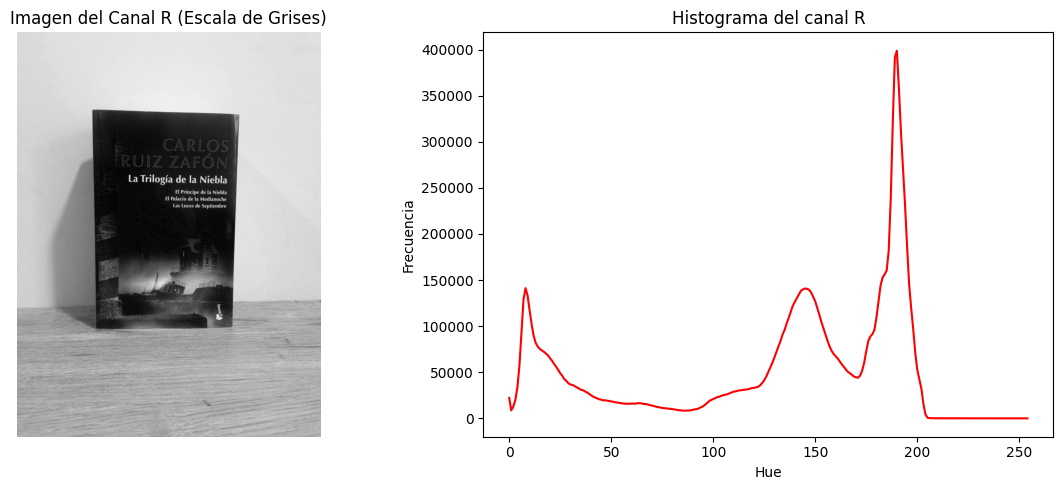

In [11]:
# Calcular el histograma del canal R
hist_H = cv2.calcHist([canal_r.astype(np.float32)], [0], None, [255], [0, 255])

# Mostrar la imagen del canal R y el histograma juntos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen del canal R en escala de grises
axs[0].imshow(canal_r, cmap='gray')
axs[0].set_title("Imagen del Canal R (Escala de Grises)")
axs[0].axis("off")

# Mostrar el histograma del canal R
axs[1].plot(hist_H, color='r')
axs[1].set_title("Histograma del canal R")
axs[1].set_xlabel("Hue")
axs[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Transformaciones unarias

* Suma
* Resta
* Multiplicación
* División

In [12]:
# Definir las funciones de las transformaciones unarias
def apply_addition(image: np.ndarray, value: float) -> np.ndarray:
    """
    Aplica una transformación lineal de suma a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param value: Valor a sumar a cada píxel de la imagen.
    :return: Imagen transformada.
    """
    # Asegurarse que los valores estén dentro del rango [0,255]
    result = np.clip(image + value, 0, 255)
    return result

def apply_subtraction(image: np.ndarray, value: float) -> np.ndarray:
    """
    Aplica una transformación lineal de resta a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param value: Valor a restar de cada píxel de la imagen.
    :return: Imagen transformada.
    """
    # Asegurarse que los valores estén dentro del rango [0,255]
    result = np.clip(image - value, 0, 255)
    return result

def apply_multiplication(image: np.ndarray, factor: float) -> np.ndarray:
    """
    Aplica una transformación lineal de multiplicación a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param factor: Factor de multiplicación para cada píxel de la imagen.
    :return: Imagen transformada.
    """
    # Asegurarse que los valores estén dentro del rango [0,255].
    result = np.clip(image * factor, 0, 255)
    return result

def apply_division(image: np.ndarray, divisor: float) -> np.ndarray:
    """
    Aplica una transformación lineal de división a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param divisor: Divisor para cada píxel de la imagen.
    :return: Imagen transformada.
    """
    if divisor == 0:
        raise ValueError("El divisor no puede ser cero.")
    # Asegurarse que los valores estén dentro del rango [0,255]
    result = np.clip(image / divisor, 0, 255)
    return result

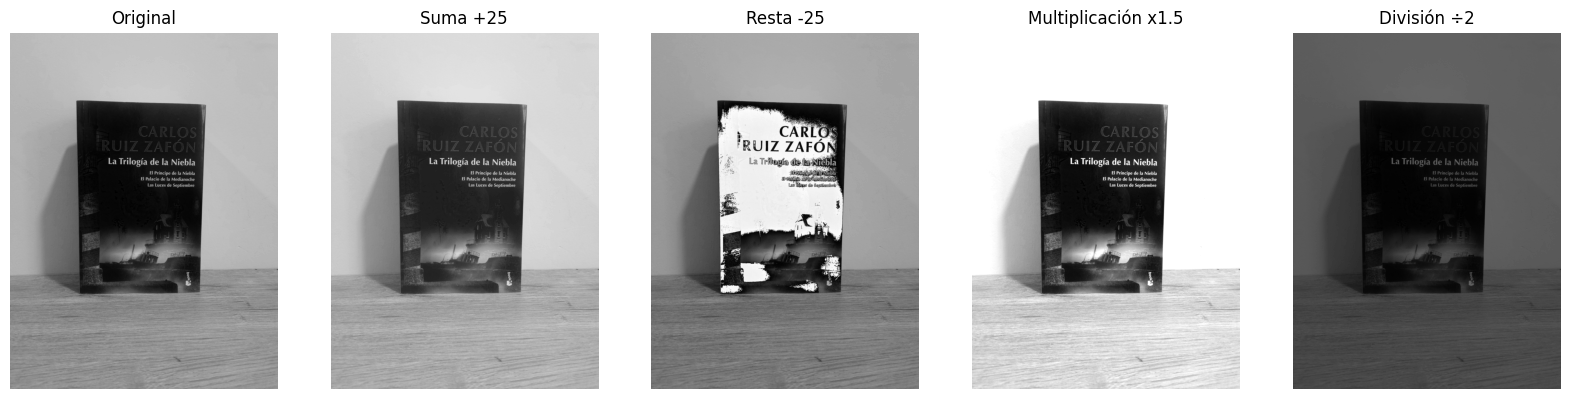

In [14]:
# Parámetros para las transformaciones
add_value = 25
sub_value = 25
mul_factor = 1.5
divisor = 2

# Aplicar las transformaciones
transformed_add = apply_addition(canal_r, add_value)
transformed_sub = apply_subtraction(canal_r, sub_value)
transformed_mul = apply_multiplication(canal_r, mul_factor)
transformed_div = apply_division(canal_r, divisor)

# Mostrar las imágenes originales y transformadas
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(canal_r, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(transformed_add, cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Suma +{add_value}')
ax[1].axis('off')

ax[2].imshow(transformed_sub, cmap='gray', vmin=0, vmax=255)
ax[2].set_title(f'Resta -{sub_value}')
ax[2].axis('off')

ax[3].imshow(transformed_mul, cmap='gray', vmin=0, vmax=255)
ax[3].set_title(f'Multiplicación x{mul_factor}')
ax[3].axis('off')

ax[4].imshow(transformed_div, cmap='gray', vmin=0, vmax=255)
ax[4].set_title(f'División ÷{divisor}')
ax[4].axis('off')

plt.show()

## Explicación

De estas operaciones, la multiplicación y la resta podrían ayudar a la correcta segmentación de la imágen. Esto porque permiten separar fácilmente la imagen de su entorno, sin confundir interfaces (Por ejemplo la interfaz que hay entre el borde inferior del libro y la mesa).

# Transformaciones no lineales.
- Parábola
- Raíz
- Gamma

In [15]:
def apply_parabola(image: np.ndarray, a: float) -> np.ndarray:
    """
    Aplica una transformación no lineal de parábola a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param a: Parámetro de la parábola.
    :return: Imagen transformada.
    """
    # Normaliza la imagen a [0, 1]
    normalized_image = image / 255.0
    # Aplica la transformación parabólica
    result = np.clip(a * (normalized_image ** 2), 0, 1) * 255
    return result

def apply_square_root(image: np.ndarray, c: float) -> np.ndarray:
    """
    Aplica una transformación no lineal de raíz cuadrada a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param c: Parámetro de la raíz cuadrada.
    :return: Imagen transformada.
    """
    # Normaliza la imagen a [0, 1]
    normalized_image = image / 255.0
    # Aplica la transformación de raíz cuadrada
    result = np.clip(c * np.sqrt(normalized_image), 0, 1) * 255
    return result

def apply_gamma_correction(image: np.ndarray, gamma: float) -> np.ndarray:
    """
    Aplica una corrección gamma a una imagen en escala de grises.

    :param image: Imagen en escala de grises como un array de NumPy.
    :param gamma: Valor de gamma para la corrección.
    :return: Imagen transformada.
    """
    # Normaliza la imagen a [0, 1]
    normalized_image = image / 255.0
    # Aplica la corrección gamma
    result = np.clip(normalized_image ** gamma, 0, 1) * 255
    return result

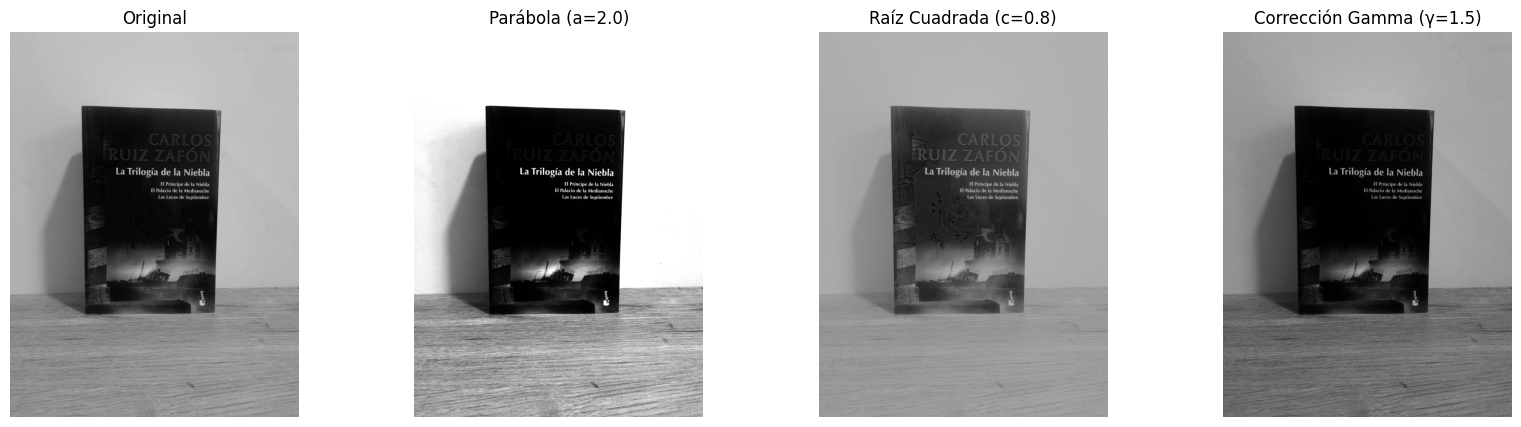

In [18]:
# Parámetros para las transformaciones no lineales
a_parabola = 2.0
c_sqrt = 0.8
gamma_value = 1.5

# Aplicar las transformaciones no lineales
transformed_parabola = apply_parabola(canal_r, a_parabola)
transformed_sqrt = apply_square_root(canal_r, c_sqrt)
transformed_gamma = apply_gamma_correction(canal_r, gamma_value)

# Mostrar las imágenes originales y transformadas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(canal_r, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(transformed_parabola, cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Parábola (a={a_parabola})')
ax[1].axis('off')

ax[2].imshow(transformed_sqrt, cmap='gray', vmin=0, vmax=255)
ax[2].set_title(f'Raíz Cuadrada (c={c_sqrt})')
ax[2].axis('off')

ax[3].imshow(transformed_gamma, cmap='gray', vmin=0, vmax=255)
ax[3].set_title(f'Corrección Gamma (γ={gamma_value})')
ax[3].axis('off')

plt.show()

## Explicación

De estas, la que mejor funciona es la corrección gamma, mantiene de mejor manera características útiles del objeto de interés, como lo puede ser el texto del libro, todo esto separando el fondo del mismo, ayudando así a la detección.

Aún así, si bien la gamma es la que mejor funciona, se elige como mejor método de transformación para la posterior segmentación a la multiplicación, ya que, según el ojímetro de los integrantes es lo que nos permitirá separar más fácilmente al libro de su ambiente. Esto debido a que mantiene las intesidades de los píxeles importantes (Los del objeto de interés) mientras las otras las intensifica para poder ser umbralizadas de manera más sencilla.



# Punto 3 (15%)

En este punto deberá:
1. Utilizar un filtro de suavizado para reducir el ruido de la imagen.
2. Implementar un algoritmo de detección de bordes.
3. Comparar los resultados con diferentes filtros y algoritmos de detección de bordes

## Explicación

Este punto es bastante autoexplicactivo. Por tanto no se entrará a mayor detalle.

**Filtros de suavizado**

* Filtro Gaussiano
* Filtro de Mediana

**Algoritmos de detección de bordes**

* Canny
* Sobel


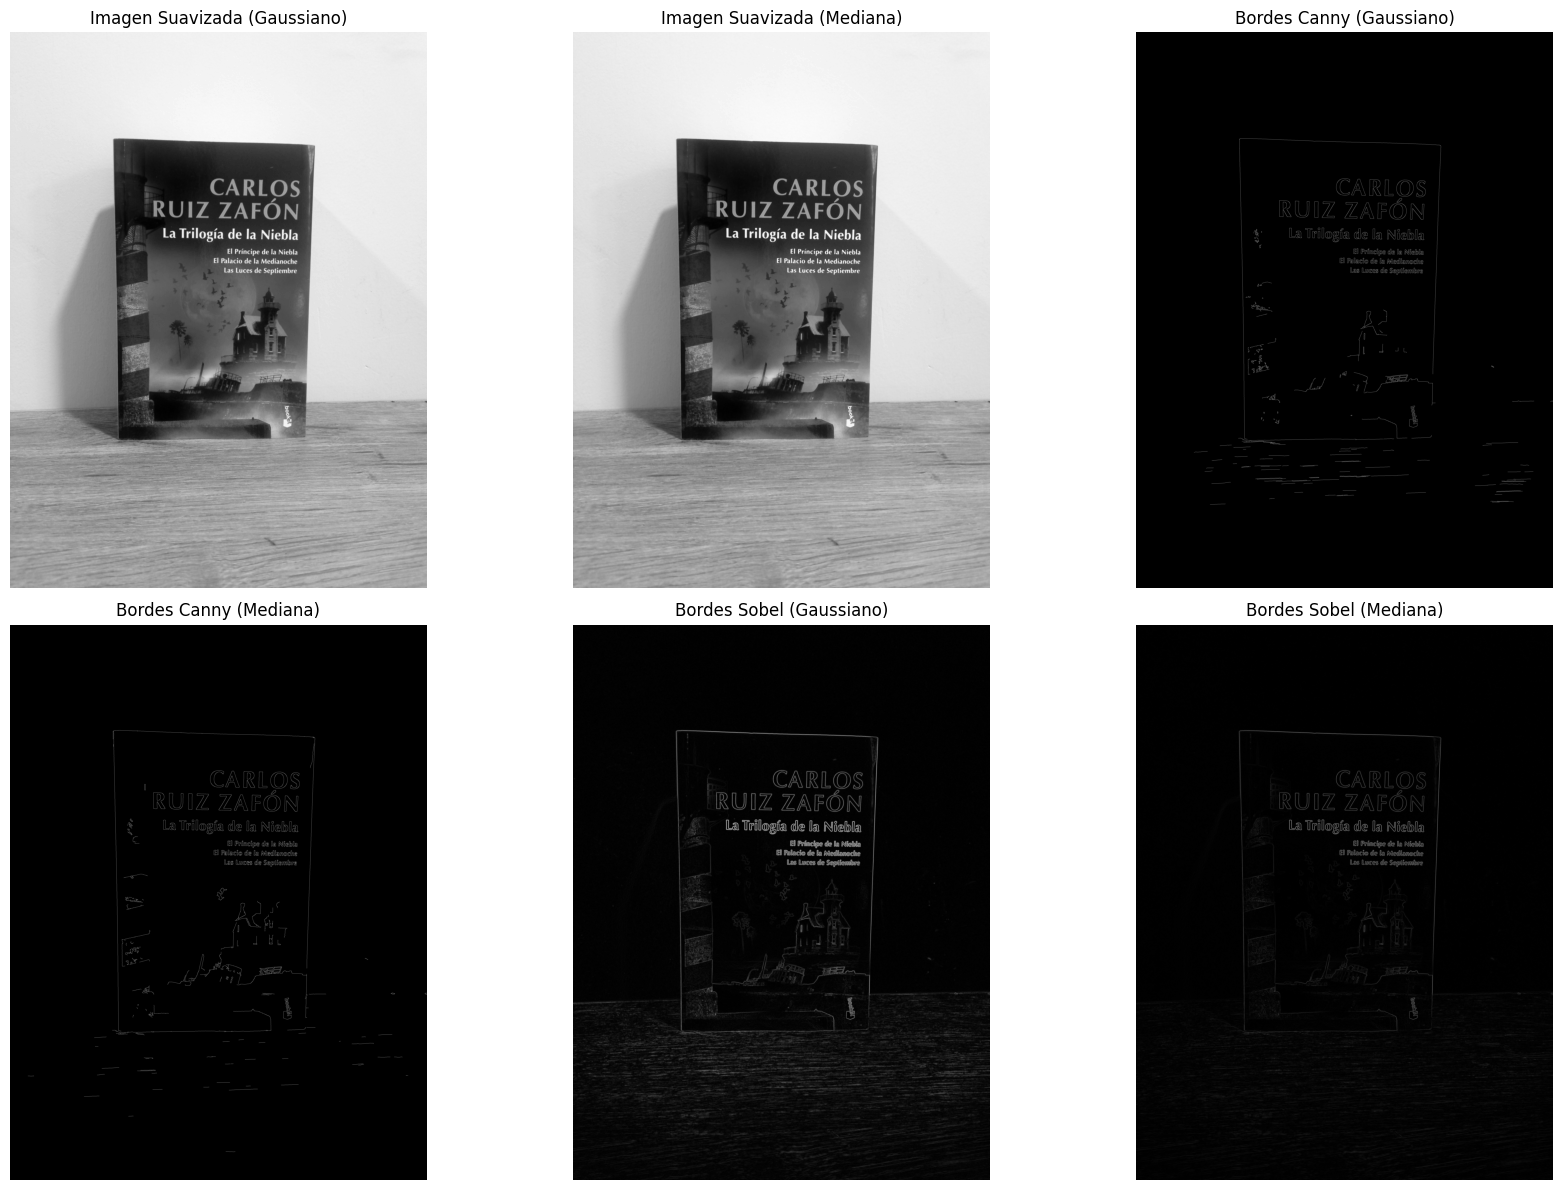

In [57]:
# Leer la imagen en escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

# Aplicar el filtro gaussiano para suavizar la imagen y reducir el ruido
imagen_gaussiana = cv2.GaussianBlur(imagen_gris, (7, 7), 0)

# Aplicar el filtro de mediana para suavizar la imagen y reducir el ruido
imagen_mediana = cv2.medianBlur(imagen_gris, 7)

# Ajustar los umbrales para el detector de bordes de Canny con la imagen suavizada (Gaussiano)
bordes_canny_gauss = cv2.Canny(imagen_gaussiana, 50, 150)

# Ajustar los umbrales para el detector de bordes de Canny con la imagen suavizada (Mediana)
bordes_canny_mediana = cv2.Canny(imagen_mediana, 50, 150)

# Aplicar el detector de Sobel en la imagen original en escala de grises
sobelx_gauss = cv2.Sobel(imagen_gaussiana, cv2.CV_64F, 1, 0, ksize=3)  # Derivada en x (Gaussiano)
sobely_gauss = cv2.Sobel(imagen_gaussiana, cv2.CV_64F, 0, 1, ksize=3)  # Derivada en y (Gaussiano)
bordes_sobel_gauss = cv2.magnitude(sobelx_gauss, sobely_gauss)

# Aplicar el detector de Sobel en la imagen suavizada con Mediana
sobelx_mediana = cv2.Sobel(imagen_mediana, cv2.CV_64F, 1, 0, ksize=3)  # Derivada en x (Mediana)
sobely_mediana = cv2.Sobel(imagen_mediana, cv2.CV_64F, 0, 1, ksize=3)  # Derivada en y (Mediana)
bordes_sobel_mediana = cv2.magnitude(sobelx_mediana, sobely_mediana)

# Crear una figura con 6 subgráficas para comparar
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Mostrar la imagen suavizada con el filtro Gaussiano
axs[0, 0].imshow(imagen_gaussiana, cmap='gray')
axs[0, 0].axis('off')  # Ocultar los ejes
axs[0, 0].set_title('Imagen Suavizada (Gaussiano)')

# Mostrar la imagen suavizada con el filtro de Mediana
axs[0, 1].imshow(imagen_mediana, cmap='gray')
axs[0, 1].axis('off')  # Ocultar los ejes
axs[0, 1].set_title('Imagen Suavizada (Mediana)')

# Mostrar los bordes detectados con Canny tras el filtro Gaussiano
axs[0, 2].imshow(bordes_canny_gauss, cmap='gray')
axs[0, 2].axis('off')  # Ocultar los ejes
axs[0, 2].set_title('Bordes Canny (Gaussiano)')

# Mostrar los bordes detectados con Canny tras el filtro de Mediana
axs[1, 0].imshow(bordes_canny_mediana, cmap='gray')
axs[1, 0].axis('off')  # Ocultar los ejes
axs[1, 0].set_title('Bordes Canny (Mediana)')

# Mostrar los bordes detectados con Sobel tras el filtro Gaussiano
axs[1, 1].imshow(bordes_sobel_gauss, cmap='gray')
axs[1, 1].axis('off')  # Ocultar los ejes
axs[1, 1].set_title('Bordes Sobel (Gaussiano)')

# Mostrar los bordes detectados con Sobel tras el filtro de Mediana
axs[1, 2].imshow(bordes_sobel_mediana, cmap='gray')
axs[1, 2].axis('off')  # Ocultar los ejes
axs[1, 2].set_title('Bordes Sobel (Mediana)')

# Ajustar el espacio entre subgráficas
plt.tight_layout()

# Mostrar la figura
plt.show()

# Punto 4 (10%)

Con su imagen original (sin ninguna modificación), desarrolle el siguiente ejercicio:


Usando las transformaciones geométricas, realice una reflexión vertical de la imagen original. La idea es crear una nueva imagen, donde la mitad de arriba sea la imagen original y su mitad de abajo sea la imagen reflejada. De esta imagen, realice una traslación en el eje x del 10% de la dimensión de x. El resultado esperado es realizar una comparativa de la imagen original con la imagen transformada

## Explicación

El punto es suficientemente autoexplicativo. Simplemente se siguieron las instrucciones pedidas.

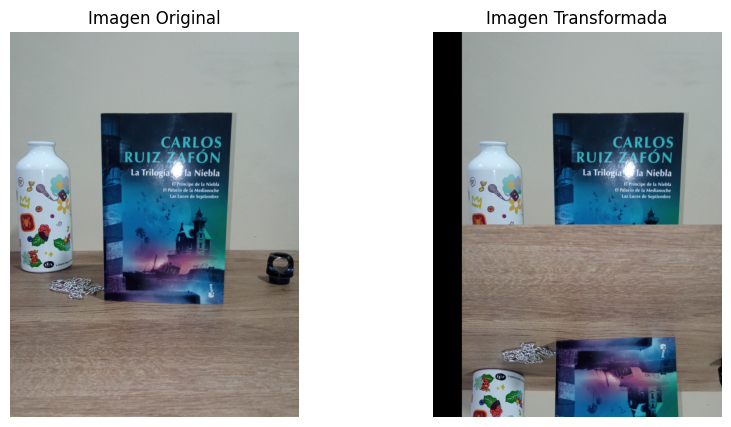

In [ ]:
# Dimensiones de la imagen
altura, ancho, _ = imagen_rgb.shape

# Reflejar la imagen verticalmente
imagen_reflejada = cv2.flip(imagen_rgb, 0)

# Dividir la imagen original en dos mitades y combinarla con la imagen reflejada
mitad_superior = imagen_rgb[:altura//2, :]
mitad_inferior = imagen_reflejada[:altura//2, :]
nueva_imagen = np.vstack((mitad_superior, mitad_inferior))

# Realizar una traslación en el eje x del 10% del ancho
M = np.float32([[1, 0, 0.1 * ancho], [0, 1, 0]])
trasladada_imagen = cv2.warpAffine(nueva_imagen, M, (ancho, altura))

# Comparativa de la imagen original con la transformada
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(imagen_rgb)
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(trasladada_imagen)
axs[1].set_title("Imagen Transformada")
axs[1].axis("off")

plt.show()

# Punto 5 (40%)

Usted deberá segmentar el objeto de interés presente en una imagen previamente procesada. Para ello, seleccione un método de segmentación adecuado y aplíquelo. Una vez segmentado el objeto, refine los resultados mediante la aplicación de operaciones morfológicas. A continuación, extraiga un conjunto de características relevantes del objeto segmentado, tales como características geométricas, texturales o de color. Organice estas características en un dataset, creando así una representación numérica del objeto. Aunque esta representación podría ser utilizada para entrenar un modelo de clasificación, en esta ocasión se limitará a esta etapa de extracción de características.

## Explicación

Para este punto se siguió el siguiente paso a paso:

1) **Procesamiento de la imagen**, en esta se realizaron las siguientes operaciones, según lo justificado anteriormente:
* Canal R, para el análisis.
* Filtro Gaussiano.
* Multiplicación de 1.5.


2) **Umbralización**, paso importante para la posterior segmentación. Acá se utiliza el método de *cv2.threshold*. Debido a que esta función sólo admite valores de 8 bits y por defecto se estaban trabajando con 32 bits, se modifica el código (Esto se ve más adelante).

3) **Contornos**, Se obtienen para que la segmentación sea más precisa en el objeto de interés.

4) **Morfología**, Se utilizaron los 4 métodos (Apertura, Cierre, Dilatación y Erosión), pero estos no generaron ningún cambio significativo en la imágen, igual se dejan en el notebook a modo de consulta.

5) **Combinación de la máscara**, Esto para ver que tan precisa quedó la máscara y como se ve el objeto ya segmentado. Se nota que, debido a la sombra del objeto y a pesar de nuestros mejores esfuerzos, no se pudo eliminar (sin meter la mano manualmente) ese pequeño detalle de sombra.

6) **Extracción de las características**, Se utilizaron las siguientes características del objeto:

* Geométricos:

  * Área del contorno
  * Perímetro del contorno
  * Rectángulo delimitador (bounding box)
  * Relación de aspecto
  * Área del rectángulo delimitador
  * Extensión (relación área contorno / área bounding box)
* Momentos Hue
* Promedio, por canal, BGR.

Estas son características importantes para la correcta identificación y clasificación de cualquier libro

## Procesamiento de la imagen.

Como vimos anteriormente, lo mejor para el procesamiento es usar la imagen en el canal R, suavizando la imagen para eliminar el ruido y la multiplicaremos por 1.5.

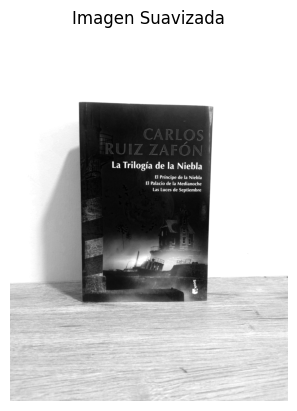

In [45]:
# Aplicar el filtro gaussiano para suavizar la imagen y reducir el ruido
imagen_suave = cv2.GaussianBlur(canal_r, (7, 7), 0)

img_mul = apply_multiplication(imagen_suave,1.5)
plt.imshow(img_mul, cmap='gray')
plt.title('Imagen Suavizada')
plt.axis('off')
plt.show()

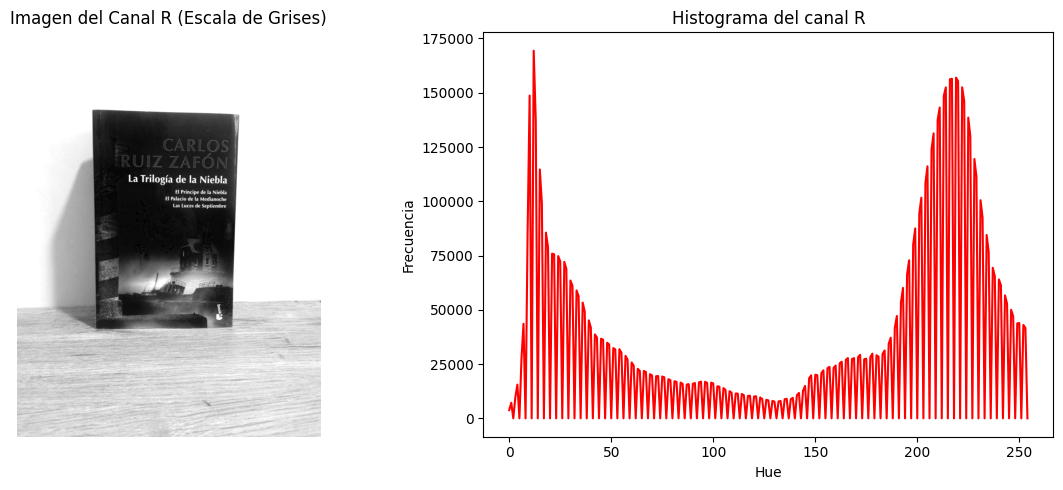

In [46]:
# Calcular el histograma del canal H fuera de la función
hist_H = cv2.calcHist([img_mul.astype(np.float32)], [0], None, [255], [0, 255])

# Mostrar la imagen del canal H y el histograma juntos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Mostrar la imagen del canal H en escala de grises
axs[0].imshow(img_mul, cmap='gray')
axs[0].set_title("Imagen del Canal R (Escala de Grises)")
axs[0].axis("off")

# Mostrar el histograma del canal H
axs[1].plot(hist_H, color='r')
axs[1].set_title("Histograma del canal R")
axs[1].set_xlabel("Hue")
axs[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Umbralizar la imagen

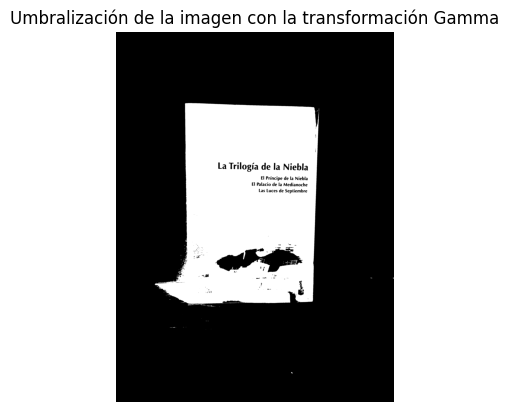

In [84]:
# El valor de 140 fue el que mejor umbralizaba la imagen, fue puro intento y error
_, tresh = cv2.threshold(img_mul, 140, 255, cv2.THRESH_BINARY_INV)

# Display the binary mask
plt.imshow(tresh, cmap='gray')
plt.title('Umbralización de la imagen con la transformación Gamma')
plt.axis('off')
plt.show()

### Obtener los contornos y el mayor area de ese contorno.

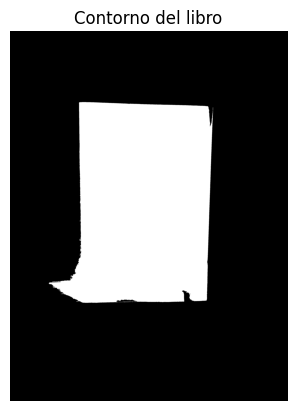

In [94]:
# Convertir la imagen umbralizada a formato de 8 bits
tresh_8bit = cv2.convertScaleAbs(tresh)

# Encontrar los contornos
contours, hierarchy = cv2.findContours(tresh_8bit, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar por el área más grande
cnt = sorted(contours, key=cv2.contourArea, reverse=True)[0]

# Obtener el tamaño de la imagen para la máscara
img_size = imagen_rgb.shape[0:2]

mask = np.zeros((img_size), dtype=np.uint8)

# Dibujar el contorno en la máscara
maskFinal = cv2.drawContours(mask, [cnt], -1, 255, -1)

plt.imshow(maskFinal, cmap='gray')
plt.title('Contorno del libro')
plt.axis('off')
plt.show()

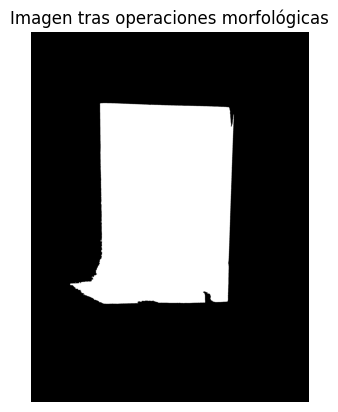

In [93]:
# Operaciones morfológicas
kernel = np.ones((5,5), np.uint8)

# Aplicar la operación de apertura (elimina ruido)
opening = cv2.morphologyEx(maskFinal, cv2.MORPH_OPEN, kernel)

# Aplicar la operación de cierre (rellena huecos)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Dilatar los contornos
dilation = cv2.dilate(closing, kernel, iterations=1)

# Erosionar para suavizar los bordes
erosion = cv2.erode(dilation, kernel, iterations=1)

# Mostrar la imagen después de las operaciones morfológicas
plt.imshow(erosion, cmap='gray')
plt.title('Imagen tras operaciones morfológicas')
plt.axis('off')
plt.show()

### Combinar la máscara con la imagen

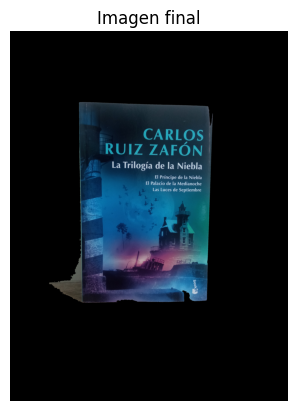

In [89]:
imagen_final = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=erosion)

plt.imshow(imagen_final)
plt.title('Imagen final')
plt.axis('off')
plt.show()

### Extracción de características

In [96]:
import pandas as pd

# Extraer características geométricas
area = cv2.contourArea(cnt)  # Área del contorno
perimeter = cv2.arcLength(cnt, True)  # Perímetro del contorno
x, y, w, h = cv2.boundingRect(cnt)  # Rectángulo delimitador (bounding box)
aspect_ratio = float(w) / h  # Relación de aspecto
rect_area = w * h  # Área del rectángulo delimitador
extent = float(area) / rect_area  # Extensión (relación área contorno / área bounding box)

# Extraer momentos geométricos
moments = cv2.moments(cnt)
hu_moments = cv2.HuMoments(moments).flatten()  # Momentos Hu

# Convertir los momentos Hu a escala logarítmica para mayor estabilidad
hu_moments_log = -np.sign(hu_moments) * np.log10(np.abs(hu_moments))

# Extraer características de color
mean_val = cv2.mean(imagen_rgb, mask=tresh_8bit)  # Promedio de cada canal (R, G, B) sobre el objeto segmentado

# Crear un diccionario con las características
data = {
    "Área": [area],
    "Perímetro": [perimeter],
    "Relación de aspecto": [aspect_ratio],
    "Extensión": [extent],
    "Momento Hu 1": [hu_moments_log[0]],
    "Momento Hu 2": [hu_moments_log[1]],
    "Momento Hu 3": [hu_moments_log[2]],
    "Momento Hu 4": [hu_moments_log[3]],
    "Momento Hu 5": [hu_moments_log[4]],
    "Momento Hu 6": [hu_moments_log[5]],
    "Momento Hu 7": [hu_moments_log[6]],
    "Promedio B": [mean_val[0]],
    "Promedio G": [mean_val[1]],
    "Promedio R": [mean_val[2]]
}

# Crear el DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

        Área     Perímetro  Relación de aspecto  Extensión  Momento Hu 1  \
0  3275691.0  10541.320302               0.8179   0.786212      0.735486   

   Momento Hu 2  Momento Hu 3  Momento Hu 4  Momento Hu 5  Momento Hu 6  \
0      2.289374      4.420728      5.299424    -11.096101     -6.605592   

   Momento Hu 7  Promedio B  Promedio G  Promedio R  
0    -10.162427   28.200688   68.312373   97.591925  


---

# ¿Cómo enviar el parcial resuelto?

Para entregar el parcial resuelto, siga los siguientes pasos:

1. Asegúrese de ejecutar todas las celdas en su cuaderno Jupyter, de manera que todos los resultados y gráficos estén actualizados.
<br></br>
2. Guarde el cuaderno Jupyter para conservar los cambios realizados.
<br></br>
3. Reúna todas las imágenes de referencia utilizadas en el cuaderno Jupyter en una sola carpeta.
<br></br>
4. Comprima el cuaderno Jupyter y la carpeta de imágenes en un archivo ZIP/RAR o comprimido. Asegúrese de que el archivo comprimido contenga tanto el cuaderno como las imágenes de referencia.
<br></br>
5. Envíe el archivo ZIP/RAR comprimido como respuesta al correo electrónico en el que se envió el parcial. No olvide incluir al monitor en copia (sasalazarr@unal.edu.co) al enviar su respuesta.

Al seguir estos pasos, garantizará que el profesor y el monitor reciban su parcial resuelto junto con las imágenes de referencia utilizadas en su cuaderno Jupyter.

<b> Plazo para enviar el parcial: </b> Viernes 20 de septiembre del 2024, antes de las 18:00